# 02: Probabilistic Regression Model with TFP

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow_probability as tfp
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
%matplotlib inline

## Make Dataset

refer: https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_05/nb_ch05_01.ipynb

### Design standard deviation $\sigma$

In [2]:
x_1 = np.linspace(1, 8, 100)
x_2 = np.repeat(8, 30)
x_3 = np.linspace(8, 1, 150)
x_4 = np.repeat(1, 60)
x_5 = np.linspace(1, 15, 120)
x_6 = np.linspace(15, 1, 200)
x_7 = np.repeat(1, 50)

In [3]:
x = np.concatenate([x_1, x_2, x_3, x_4, x_5, x_6, x_7])

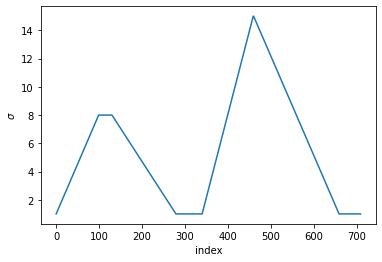

In [4]:
plt.plot(x)
plt.xlabel("index")
plt.ylabel("$\sigma$")
plt.show()

In [5]:
x.shape

(710,)

### Generate samples based on $\sigma$

In [6]:
noise = np.random.normal(0, x, size=len(x))

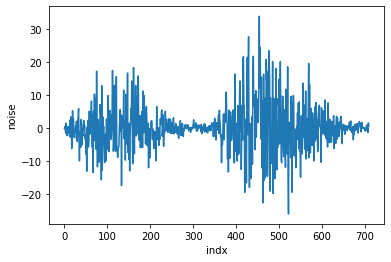

In [7]:
plt.plot(noise)
plt.xlabel("indx")
plt.ylabel("noise")
plt.show()

In [8]:
x_sample = np.sort(np.random.uniform(-3, 3, size=len(x)))

In [9]:
y_sample = 3.3 * x_sample + 3.0 + noise

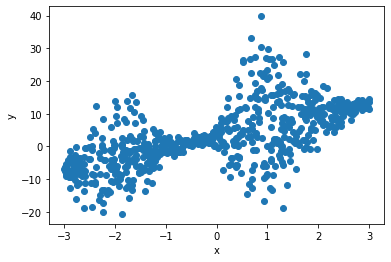

In [10]:
plt.scatter(x_sample, y_sample)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Split Train / Validation / Test dataset

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [12]:
order_idx_train = x_train.argsort(axis=0)

In [13]:
x_train = x_train[order_idx_train]
y_train = y_train[order_idx_train]
x_train.shape

(454,)

In [14]:
order_idx_val = x_val.argsort(axis=0)

In [15]:
x_val = x_val[order_idx_val]
y_val = y_val[order_idx_val]
x_val.shape

(114,)

In [16]:
order_idx_test = x_test.argsort(axis=0)

In [17]:
x_test = x_test[order_idx_test]
y_test = y_test[order_idx_test]

In [18]:
x_test.shape

(142,)

### Visualize Train, Validation, Test

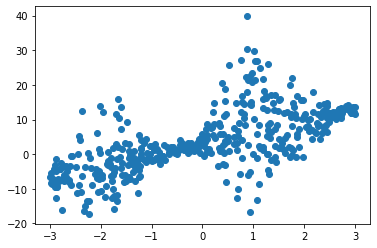

In [19]:
plt.scatter(x_train, y_train)

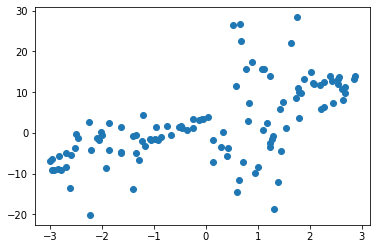

In [20]:
plt.scatter(x_val, y_val)

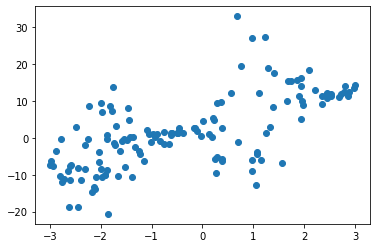

In [21]:
plt.scatter(x_test, y_test)

## Fitting and evaluating a linear regression model with constant variance

In [22]:
def NLL(y, distribution):
    return -distribution.log_prob(y)

def my_dist(params):
    return tfp.distributions.Normal(loc=params, scale=1)

inputs = Input(shape=(1,))
params = Dense(1)(inputs)
dist = tfp.layers.DistributionLambda(my_dist)(params)
model_sd_1 = Model(inputs=inputs, outputs=dist)
model_sd_1.compile(Adam(), loss=NLL)

In [23]:
model_sd_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
distribution_lambda (Distrib multiple                  0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model_sd_1.fit(x_train, y_train, epochs=2000, verbose=0, validation_data=(x_val, y_val))

Let's check the training found the correct slope and intercept.

In [25]:
model_sd_1.get_weights()

[array([[3.4349113]], dtype=float32), array([3.487339], dtype=float32)]

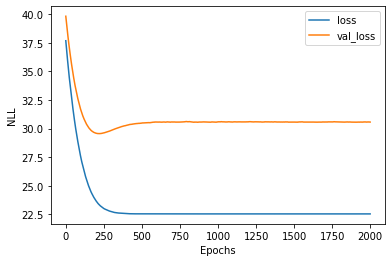

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylabel('NLL')
plt.xlabel('Epochs')
plt.show()

In [27]:
x_pred = np.arange(-3, 3, 0.1)
x_pred.shape

(60,)

In [28]:
preds = model_sd_1(x_pred).mean()

In [29]:
sigma = 1 # predefined

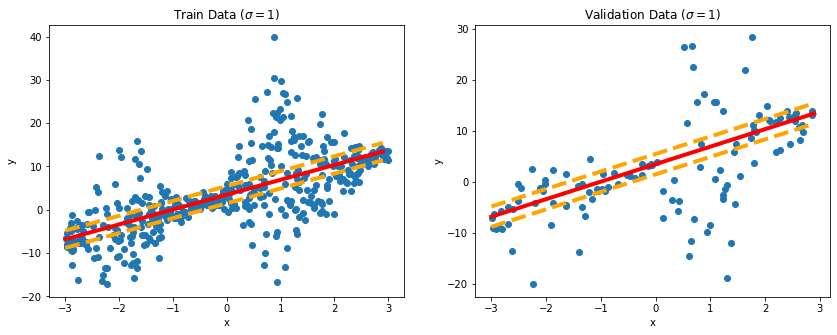

In [30]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.scatter(x_train, y_train)
plt.plot(x_pred, preds, color="red", linewidth=4)
plt.plot(x_pred, preds + 2*sigma, color="orange", linestyle="--", linewidth=4)
plt.plot(x_pred, preds - 2*sigma, color="orange", linestyle="--", linewidth=4)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Train Data ($\sigma=1$)")

plt.subplot(1,2,2)
plt.scatter(x_val, y_val)
plt.plot(x_pred, preds, color="red", linewidth=4)
plt.plot(x_pred, preds + 2*sigma, color="orange", linestyle="--", linewidth=4)
plt.plot(x_pred, preds - 2*sigma, color="orange", linestyle="--", linewidth=4)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation Data ($\sigma=1$)")
plt.show()

## Performance (NLL)

In [31]:
model_sd_1.evaluate(x_train, y_train)

15/15 [==============================] - 0s 1ms/step - loss: 22.5339


22.53386116027832

In [32]:
model_sd_1.evaluate(x_val, y_val)

4/4 [==============================] - 0s 1ms/step - loss: 30.5645


30.56452178955078

## How about using $\sigma=5$?

In [33]:
def NLL(y, distribution):
    return -distribution.log_prob(y)

def my_dist(params):
    return tfp.distributions.Normal(loc=params, scale=5)

inputs = Input(shape=(1,))
params = Dense(1)(inputs)
dist = tfp.layers.DistributionLambda(my_dist)(params)
model_sd_5 = Model(inputs=inputs, outputs=dist)
model_sd_5.compile(Adam(), loss=NLL)

In [34]:
history = model_sd_5.fit(x_train, y_train, epochs=2000, verbose=0, validation_data=(x_val, y_val))

In [35]:
model_sd_5.get_weights()

[array([[3.4554172]], dtype=float32), array([3.4906428], dtype=float32)]

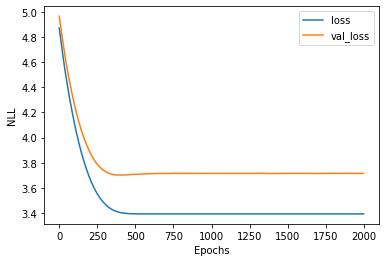

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylabel('NLL')
plt.xlabel('Epochs')
plt.show()

In [37]:
preds = model_sd_5(x_pred).mean()

In [38]:
sigma = 5 # predefined

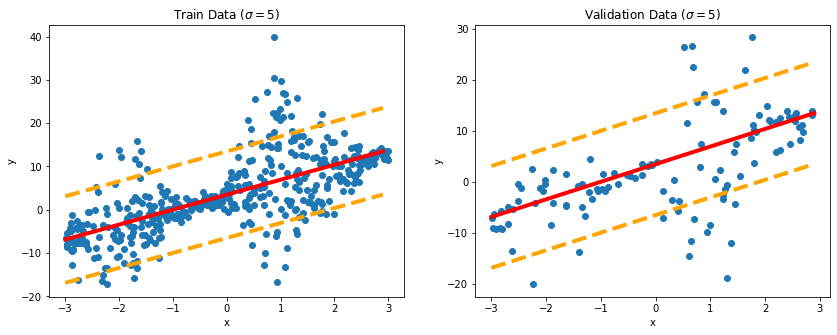

In [39]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.scatter(x_train, y_train)
plt.plot(x_pred, preds, color="red", linewidth=4)
plt.plot(x_pred, preds + 2*sigma, color="orange", linestyle="--", linewidth=4)
plt.plot(x_pred, preds - 2*sigma, color="orange", linestyle="--", linewidth=4)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Train Data ($\sigma=5$)")

plt.subplot(1,2,2)
plt.scatter(x_val, y_val)
plt.plot(x_pred, preds, color="red", linewidth=4)
plt.plot(x_pred, preds + 2*sigma, color="orange", linestyle="--", linewidth=4)
plt.plot(x_pred, preds - 2*sigma, color="orange", linestyle="--", linewidth=4)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation Data ($\sigma=5$)")
plt.show()

In [40]:
model_sd_5.evaluate(x_train, y_train)

15/15 [==============================] - 0s 1ms/step - loss: 3.3930


3.3929660320281982

In [41]:
model_sd_5.evaluate(x_val, y_val)

4/4 [==============================] - 0s 1ms/step - loss: 3.7149


3.7148962020874023